Shape of train X is (159, 4)
Shape of test X is (40, 4)
Shape of train Y is (159, 1)
Shape of test Y is (40, 1)
Train accuracy of keras neural network: 0.0076368876383867135
Test accuracy of keras neural network: 0.005297798368704591


   shib  ertefaae_sine  ertefaae_kol  mohit_dar_nim_metr  result
0    45            436          15.3                 252   0.090
1    40            480          17.4                 266   0.103
2    30            504          15.8                 266   0.114
3    30            480          14.2                 260   0.087
4    20            474          13.0                 310   0.106


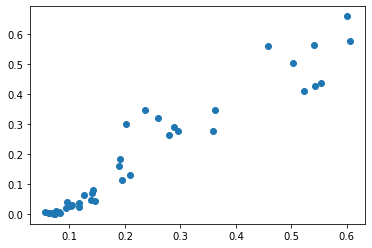

In [23]:
#prepare data downloaded from UCL

import xlrd
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") #suppress warnings
import matplotlib.pyplot as plt
from keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.metrics import mean_squared_error

# add header names
headers =  ['shib',"ertefaae_sine",
        'ertefaae_kol','mohit_dar_nim_metr', 'result']
heart_df = pd.read_excel('trees.xlsx',sheet_name='Vol_Zaraieb_1', usecols=headers)

#convert imput to numpy arrays
X = heart_df.drop(columns=['result'])

y_label = heart_df['result'].values.reshape(X.shape[0], 1)


#split data into train and test set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_label, test_size=0.2, random_state=2)

#standardize the dataset
sc = preprocessing.MinMaxScaler()
sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)
Xtest = sc.transform(Xtest)

scx = preprocessing.MinMaxScaler()
scx.fit(ytrain)
ytrain = scx.transform(ytrain)
ytest = scx.transform(ytest)
print(f"Shape of train X is {Xtrain.shape}")
print(f"Shape of test X is {Xtest.shape}")
print(f"Shape of train Y is {ytrain.shape}")
print(f"Shape of test Y is {ytest.shape}")

# define the model
model = Sequential()
model.add(Dense(3, input_shape=(4,)))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy', 'mse'])
hist = model.fit(Xtrain, ytrain, epochs=400, verbose=0,shuffle=True, validation_split=0.1, batch_size=50)
train_pred = model.predict(Xtrain)
test_pred = model.predict(Xtest)
print("Train accuracy of keras neural network: {}".format(mean_squared_error(train_pred, ytrain)))
print("Test accuracy of keras neural network: {}".format(mean_squared_error(test_pred, ytest)))
print("\n")
print(heart_df.head())

plt.scatter(test_pred, ytest)



In [24]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [25]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 3)                 15        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [26]:
test_pred = model.predict(Xtest)

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_pred, ytest)

0.005297798368704591

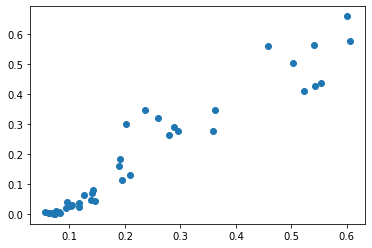

In [28]:
plt.scatter(test_pred, ytest)

In [33]:
np.max(ytrain), np.min(ytrain)

(1.0, 0.0)

In [29]:
import matplotlib.pyplot as plt 
%matplotlib inline

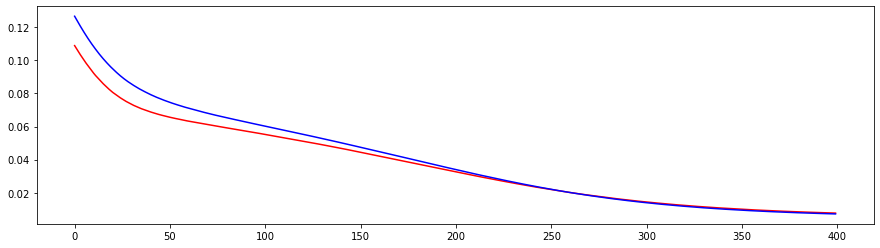

In [30]:
plt.figure(figsize=(15,4))
plt.plot(hist.history['mse'], c='red')
plt.plot(hist.history['val_mse'], c='blue')